# Cleaning NBA Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# 14 stats columns commonly seen for fantasy points in daily week match
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta'
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [15]:
# read in player stats per game data from csv folder
# Ensure first row in the data frame (header = 0), are the headers
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [16]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [17]:
df.sample(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
6234,2744,2010-11,82.0,26.0,35.9,8.0,16.1,0.496,0.0,0.0,...,2.7,3.5,0.761,2.9,6.8,1.8,1.3,0.6,1.9,18.6
7913,202730,2013-14,65.0,25.0,16.5,2.1,4.6,0.447,0.0,0.2,...,0.5,0.8,0.660,1.8,3.0,1.1,0.7,0.4,0.5,4.7
3545,1506,2004-05,73.0,30.0,25.0,2.6,6.8,0.378,0.6,2.4,...,3.1,3.5,0.883,1.4,3.7,1.3,1.4,0.7,0.2,8.9
5645,1913,2008-09,11.0,32.0,3.2,0.2,0.6,0.286,0.0,0.0,...,0.2,0.2,1.000,0.5,0.5,0.0,0.2,0.3,0.1,0.5
5366,2740,2008-09,62.0,23.0,30.1,5.0,8.6,0.578,0.0,0.0,...,1.9,3.5,0.551,3.6,7.6,2.0,1.8,1.0,1.5,11.9


In [19]:
# If not already noticeable some additional data is provided in columns
# (min, age, season_id, etc)
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [21]:
# Drop rows that have missing data (only rows where all data is missing)
df_cleaned = df.dropna(how = 'all')

In [22]:
# Drop outliers
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [24]:
# Want to capture players that play more than three standard deviations away from the mean
# This could be that these players may have had injuries or lack of talent
# resulting in the coach not wanting them to play
# These players can weigh down the model if not removed
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std()*3)

In [25]:
min_gp

-22.712012335693153

In [40]:
# Seems like outliers are too far away since negative number is returned

In [41]:
# Different approach use histogram to see min number of games played
# Stop at 82 since there are 82 games in a season
bin_values = np.arange(start = 0, stop = 82, step = 2)

<Axes: >

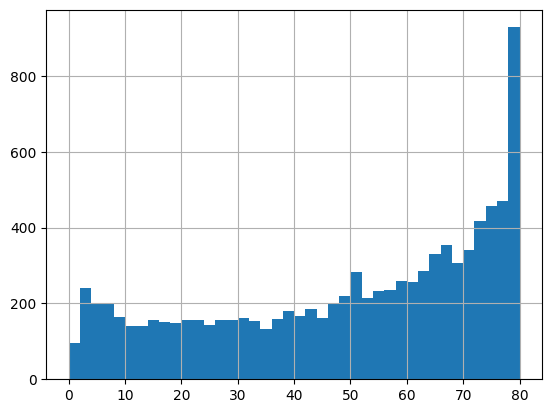

In [42]:
df_cleaned['gp'].hist(bins = bin_values)

In [43]:
# Starts to drop till 10, 10 can be the minimum number of games played

In [44]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp']>min_gp]

In [45]:
# To see how many players dropped
print(df_cleaned['player_id'].count() - df_filter['player_id'].count())

971


In [46]:
df_filter['gp'].describe()

count    9662.000000
mean       57.406541
std        21.069625
min        11.000000
25%        42.000000
50%        63.000000
75%        76.000000
max        85.000000
Name: gp, dtype: float64

# Normalized Data Across Seasons

In [48]:
# Someone who scored 22 points per game in the 1999 season may not be as
# impressive if they scored the same amount of points in the 2019 season
# Rules, play style and other factors have greatly changed 

In [ ]:
# Normalize stats for each season
# Function that factors in the season max and min value and normalize that stat
# First try it with a single season before applying to all season stats

In [49]:
season = (df_filter['season_id'] == '2017-18')

In [50]:
df_2018 = df_filter[season]

In [52]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9621,1627741,2017-18,80.0,25.0,25.3,5.2,11.7,0.446,2.2,5.1,...,0.9,1.0,0.877,0.7,3.2,1.9,1.6,1.1,0.3,13.5
9599,202340,2017-18,46.0,27.0,31.2,5.6,13.6,0.414,1.6,4.4,...,1.4,1.8,0.768,0.5,2.0,2.0,2.2,1.1,0.2,14.3
9718,201569,2017-18,69.0,29.0,31.2,6.0,14.1,0.428,3.2,8.8,...,2.8,3.5,0.809,0.4,2.1,2.2,1.9,0.6,0.4,18.0
9696,203079,2017-18,30.0,26.0,30.6,5.4,13.7,0.398,1.7,5.7,...,1.7,2.3,0.739,0.3,2.3,3.8,2.3,0.8,0.3,14.3
9985,1626188,2017-18,33.0,25.0,22.4,3.7,7.6,0.484,1.4,3.2,...,0.7,0.8,0.880,0.3,2.2,2.7,1.0,0.4,0.0,9.5
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,6.6,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1
9879,202713,2017-18,12.0,30.0,4.9,0.6,1.8,0.333,0.2,0.4,...,0.6,1.1,0.538,0.1,0.8,0.2,0.3,0.1,0.0,1.9
10084,201961,2017-18,77.0,30.0,26.5,3.7,9.1,0.407,2.9,7.5,...,0.9,1.0,0.859,0.3,2.5,1.0,0.7,0.7,0.1,11.2
9707,203939,2017-18,79.0,26.0,21.2,3.2,5.4,0.593,0.4,1.1,...,1.7,2.3,0.719,1.7,3.9,1.2,0.7,0.8,0.4,8.5
9968,201600,2017-18,18.0,31.0,10.1,0.5,1.2,0.409,0.0,0.0,...,0.2,0.7,0.308,0.5,2.1,0.2,0.5,0.1,0.2,1.2


In [55]:
# To normalize take the points value substract the column minimum
# divided by the difference between max and min column value

In [60]:
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min())/(df_2018['pts'].max() - df_2018['pts'].min())

/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_84397/2835687542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min())/(df_2018['pts'].max() - df_2018['pts'].min())


In [61]:
df_2018.sort_values('pts_norm', ascending = False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [95]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [96]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [97]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [98]:
def replace(df):
    for cols in cols_to_norm:
        df['{}_norm'.format(cols)] = normalize(df[cols])
    return df

In [99]:
df_2018_norm = replace(df_2018)

/var/folders/tq/_cbl6ng92jg5mjvmj4_4fy3w0000gn/T/ipykernel_84397/3769116981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(cols)] = normalize(df[cols])


In [100]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9851,203994,2017-18,79.0,23.0,26.4,6.1,12.0,0.505,0.0,0.1,...,0.000000,0.01,0.252874,0.346535,0.470588,0.598131,0.174757,0.333333,0.46,0.538462
9739,201609,2017-18,75.0,32.0,31.7,6.5,14.3,0.450,1.5,4.0,...,0.357143,0.40,0.333333,0.356436,0.137255,0.299065,0.466019,0.333333,0.44,0.076923
10015,1628400,2017-18,73.0,23.0,15.8,0.9,2.6,0.346,0.5,1.7,...,0.119048,0.17,0.034483,0.059406,0.098039,0.140187,0.029126,0.125000,0.06,0.038462
10007,203497,2017-18,56.0,26.0,32.4,4.9,7.9,0.622,0.0,0.0,...,0.000000,0.00,0.413793,0.524752,0.568627,0.710280,0.135922,0.333333,0.38,0.884615
9996,1626158,2017-18,48.0,24.0,15.5,2.8,5.0,0.560,0.1,0.6,...,0.023810,0.06,0.091954,0.118812,0.235294,0.280374,0.126214,0.166667,0.10,0.230769
9787,201162,2017-18,48.0,32.0,14.3,1.0,2.5,0.393,0.6,1.7,...,0.142857,0.17,0.068966,0.069307,0.039216,0.149533,0.155340,0.208333,0.12,0.076923
9656,201568,2017-18,21.0,29.0,32.0,4.9,12.2,0.398,1.7,5.3,...,0.404762,0.53,0.448276,0.405941,0.078431,0.392523,0.194175,0.250000,0.24,0.192308
9754,202738,2017-18,32.0,29.0,26.9,4.9,13.2,0.373,1.7,5.9,...,0.404762,0.59,0.425287,0.405941,0.098039,0.130841,0.466019,0.208333,0.60,0.038462
10068,203898,2017-18,54.0,23.0,12.7,1.7,4.1,0.420,0.3,1.0,...,0.071429,0.10,0.045977,0.049505,0.078431,0.112150,0.184466,0.250000,0.14,0.076923
9627,1627747,2017-18,71.0,23.0,26.2,4.5,10.4,0.435,1.2,3.5,...,0.285714,0.35,0.218391,0.257426,0.137255,0.252336,0.407767,0.500000,0.44,0.115385


In [101]:
# Used groupby method to apply this to each seasons
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [102]:
df_new = df_filter.groupby('season_id').apply(replace)
df_new.head(10)

player_id season_id    gp   age   min  fgm   fga  fg_pct  fg3m  \
season_id                                                                      
1996-97   0         471   1996-97  41.0   NaN  13.3  1.1   3.3   0.331   0.2   
          1         920   1996-97  83.0  33.0  30.8  2.8   5.8   0.483   0.0   
          2         243   1996-97  83.0  24.0  20.4  1.8   4.4   0.411   0.5   
          3        1425   1996-97  33.0  25.0  17.8  2.6   4.5   0.574   0.0   
          4         768   1996-97  47.0  27.0  11.1  1.4   3.8   0.374   0.0   
          5         228   1996-97  62.0  27.0  15.4  1.3   2.6   0.513   0.0   
          6         154   1996-97  45.0  30.0  13.1  0.9   2.0   0.435   0.0   
          7         673   1996-97  30.0  24.0  17.2  2.6   5.4   0.475   0.0   
          9         275   1996-97  81.0  26.0  34.3  5.4  12.7   0.423   1.8   
          10        947   1996-97  76.0  22.0  41.1  8.2  19.8   0.416   2.0   

              fg3a  ...  fg3m_norm  fg3a_norm  ftm_norm  fta_norm  oreb_norm  \
season_id           ...                                                        
1996-97   0    0.7  ...   0.071429   0.090909  0.156250  0.127660   0.118644   
          1    0.2  ...   0.000000   0.025974  0.234375  0.255319   0.457627   
          2    1.2  ...   0.178571   0.155844  0.171875  0.138298   0.084746   
          3    0.0  ...   0.000000   0.000000  0.156250  0.159574   0.322034   
          4    0.1  ...   0.000000   0.012987  0.171875  0.191489   0.118644   
          5    0.0  ...   0.000000   0.000000  0.171875  0.180851   0.203390   
          6    0.0  ...   0.000000   0.000000  0.078125  0.117021   0.220339   
          7    0.0  ...   0.000000   0.000000  0.234375  0.265957   0.271186   
          9    4.7  ...   0.642857   0.610390  0.343750  0.287234   0.084746   
          10   6.0  ...   0.714286   0.779221  0.781250  0.765957   0.254237   

              dreb_norm  ast_norm  stl_norm  tov_norm  blk_norm  
season_id                                                        
1996-97   0        0.16  0.122807  0.074074  0.181818  0.088235  
          1        0.50  0.070175  0.296296  0.204545  0.058824  
          2        0.20  0.166667  0.333333  0.250000  0.088235  
          3        0.23  0.043860  0.185185  0.227273  0.264706  
          4        0.11  0.035088  0.111111  0.159091  0.176471  
          5        0.21  0.043860  0.185185  0.159091  0.058824  
          6        0.22  0.026316  0.148148  0.136364  0.058824  
          7        0.21  0.070175  0.259259  0.227273  0.058824  
          9        0.22  0.192982  0.185185  0.477273  0.058824  
          10       0.24  0.657895  0.777778  1.000000  0.088235  

[10 rows x 35 columns]

# Distance Error between Players

In [104]:
def calc_distance(plyr1, plyr2):
    # Euclidean measurement between two player's stats
    # Measures the length of a segment connecting the two player's stats
    dist = np.sqrt(np.sum((plyr1-plyr2)**2))
    return dist

In [120]:
# Example Damian Lillard with Stephen Curry and Rudy Gobert
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [108]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols = ['player_id', 'season_id', 'pts'])

In [114]:
# Run a left merge a.k.a a left outer join
# This will keep every row in the left data frame and try and match the 
# right data frame based on the 'on colum'
# If the right data frame doesn't have any of the values then non values will be added
df3 = pd.merge(df1,df2,on = 'player_id', how= 'left')

In [115]:
df3.sample(5)

,player_id,player_name,season_id,pts
893,1717,Dirk Nowitzki,2013-14,21.7
426,201228,C.J. Watson,2007-08,3.7
2210,203935,Marcus Smart,2015-16,9.1
3199,203503,Tony Snell,2015-16,5.3
824,1627884,Derrick Jones Jr.,2018-19,7.0


In [116]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [117]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
598,1626245,Cristiano Felicio,2018-19,4.0
1341,2037,Jamal Crawford,2018-19,7.9
2295,203090,Maurice Harkless,2018-19,7.7
2909,1626257,Salah Mejri,2018-19,3.9
1934,203937,Kyle Anderson,2018-19,8.0


In [119]:
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
curry_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [138]:
# Use to list function so that pts can be accessed as a variable
dame_ppg = dame_df.pts.tolist()[0]
curry_ppg = curry_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [139]:
calc_distance(dame_ppg, curry_ppg)

1.5

In [140]:
calc_distance(dame_ppg, rudy_ppg)

9.9

In [141]:
# As a result Dame and Curry were closer than Dame and Ruby when 
# it came to points per game